In [1]:
import pandas as pd
from darts import TimeSeries

# Read CSV File containing Time Series Data:
df = pd.read_csv('saputf8.csv', delimiter=";")
df.iloc[:, 1:8] = df.iloc[:, 1:8].replace(',\d*', '', regex=True)
df.iloc[:, 1:8] = df.iloc[:, 1:8].astype(float)
df.head()
df.shape[0]

96

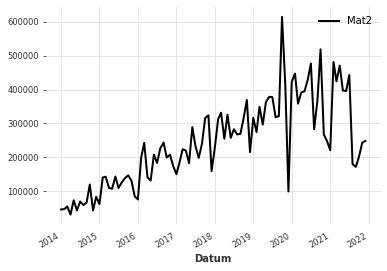

In [2]:
b

There is seasonality of order 4.
There is seasonality of order 12.
There is seasonality of order 20.


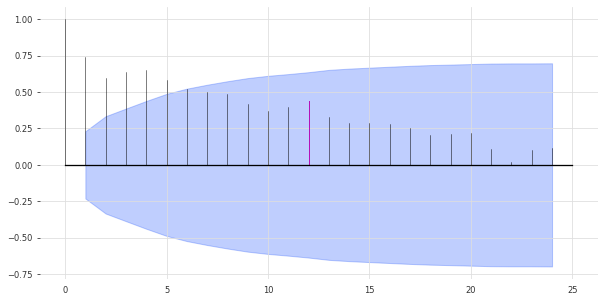

In [3]:
# Inspect Seasonality using auto-correlation function:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)

sp = []

for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))
        sp.append(period)

In [4]:
# Import Exponential Smoothing Model:
from darts.models import ExponentialSmoothing
from darts.utils.utils import ModelMode, SeasonalityMode

model = ExponentialSmoothing()

# Gridsearch with expanding window cross validation to evaluate best hyperparameters (error prevention):
param_grid = {
    "trend": [ModelMode.ADDITIVE, ModelMode.MULTIPLICATIVE],
    "damped": [True, False],
    "seasonal": [SeasonalityMode.ADDITIVE, SeasonalityMode.MULTIPLICATIVE],
    "seasonal_periods:": [4,12,20]
}

gscv = model.gridsearch(parameters=param_grid, series=train, forecast_horizon=24)

gscv.fit(train)
prediction = gscv.predict(len(val), num_samples=1)

TypeError: fit() got an unexpected keyword argument 'seasonal_periods:'

In [ ]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label='Forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [ ]:
from darts.metrics import mape, mae, rmse

print("Mean absolute percentage error (MAPE): {:.2f}%.".format(mape(series, prediction) ) )
print("Mean absolute error (MAE): {:.2f}.".format(mae(series, prediction) ) )
print("Root mean squared error (RMSE): {:.2f}.".format(rmse(series, prediction) ) )